# LSTM FLIP BITS

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, TimeDistributed, Flatten
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [106]:
input_file = '/Users/niall/Documents/Cypress_Code/Notebooks/flip_bits_dataset.csv'

print ('Loading data...')
flip_bits_dataset = pd.read_csv(input_file,index_col=0)

print('Data Loaded!')

Loading data...
Data Loaded!


In [114]:
from numpy import genfromtxt

my_data_flipped = genfromtxt(input_file, delimiter=',')

In [118]:
new_data = np.delete(my_data_flipped, (0), axis=0)

In [119]:
print(new_data[:10])

[[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [2. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [3. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [4. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [5. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [6. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [7. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [8. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [9. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.

In [120]:
print(np.shape(new_data))

(15500, 33)


In [121]:
X2 = np.delete(new_data, (0,32), axis=1)

In [128]:
print(X2[1])
print(X2[15499])


[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 0.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0.]


In [130]:
Y2 = new_data[:,32]
print(np.shape(Y2))
print(Y2[1])
print(Y2[15499])

(15500,)
1.0
0.0


In [123]:
print(np.shape(X2))

(15500, 31)


In [ ]:
print(np.shape(new_data))

In [107]:
flip_bits_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Label
0,1,0,0,0,0,1,0,0,1,0,...,1,1,0,1,1,1,0,1,0,1
1,1,0,0,0,0,1,0,0,1,0,...,1,1,0,1,1,1,0,1,0,1
2,1,0,0,0,0,1,0,0,1,0,...,1,1,0,1,1,1,0,1,0,1
3,1,0,0,0,0,1,0,0,1,0,...,1,1,0,1,1,1,0,1,0,1
4,1,0,0,0,0,1,0,0,1,0,...,1,1,0,1,1,1,0,1,0,1


In [74]:
print(len(flip_bits_dataset))

15500


In [75]:
flip_bits_dataset = shuffle(flip_bits_dataset)

In [78]:
flip_bits_dataset.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Label
8960,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,1,0,0,0,0,1,0,0,1,0,...,1,1,0,1,1,1,0,1,0,1
9607,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13263,1,1,0,1,0,1,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
7744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
flip_bits_dataset['0']

3284     1
1794     0
8800     0
15283    0
2947     0
        ..
1616     1
4897     1
6307     1
5868     0
3726     0
Name: 0, Length: 15500, dtype: int64

In [79]:
X1 = []

for i in range(0,  len(flip_bits_dataset)):
    X1.append([flip_bits_dataset['0'][i], 
               flip_bits_dataset['1'][i],
               flip_bits_dataset['2'][i],
               flip_bits_dataset['3'][i],
               flip_bits_dataset['4'][i],
               flip_bits_dataset['5'][i],
               flip_bits_dataset['6'][i],
               flip_bits_dataset['7'][i],
               flip_bits_dataset['8'][i],
               flip_bits_dataset['9'][i],
               flip_bits_dataset['10'][i],
               flip_bits_dataset['11'][i],
               flip_bits_dataset['12'][i],
               flip_bits_dataset['13'][i],
               flip_bits_dataset['14'][i],
               flip_bits_dataset['15'][i],
               flip_bits_dataset['16'][i],
               flip_bits_dataset['17'][i],
               flip_bits_dataset['18'][i],
               flip_bits_dataset['19'][i],
               flip_bits_dataset['20'][i],
               flip_bits_dataset['21'][i],
               flip_bits_dataset['22'][i],
               flip_bits_dataset['23'][i],
               flip_bits_dataset['24'][i],
               flip_bits_dataset['25'][i],
               flip_bits_dataset['26'][i],
               flip_bits_dataset['27'][i],
               flip_bits_dataset['28'][i],
               flip_bits_dataset['29'][i],
               flip_bits_dataset['30'][i]])
    
print(np.shape(X1))

(15500, 31)


In [105]:
flip_bits_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Label
5120,1,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,1,1,0,1,0
8900,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4313,1,0,1,1,1,0,1,0,1,0,...,1,1,1,1,1,0,0,0,1,0
2940,0,1,1,0,0,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0
4259,0,1,0,0,1,0,1,1,0,0,...,1,1,0,1,0,1,0,0,0,0


In [ ]:
print(np.shape(X1))

In [95]:
y = flip_bits_dataset['Label'].to_numpy()

In [96]:
print(np.shape(X1))
print(np.shape(y))

(15500, 31)
(15500,)


In [102]:
print(y[46])
print(y[92])
print(y[121])
print(y[896])

1
1
0
0


In [103]:
print(X1[46])
print(X1[92])
print(X1[121])
print(X1[896])

[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]


In [100]:
x = np.where(y == 1)
print(x)

(array([   46,    92,   116,   120,   139,   159,   161,   271,   341,
         387,   398,   409,   419,   460,   485,   632,   642,   645,
         684,   702,   713,   736,   759,   784,   789,   795,   855,
         895,   969,  1020,  1059,  1086,  1183,  1202,  1208,  1260,
        1285,  1331,  1349,  1358,  1394,  1638,  1654,  1671,  1680,
        1684,  1696,  1712,  1724,  1885,  1899,  1904,  1907,  1935,
        1949,  1987,  1999,  2018,  2046,  2070,  2098,  2101,  2114,
        2191,  2214,  2305,  2327,  2381,  2521,  2571,  2618,  2760,
        2769,  2873,  3010,  3019,  3037,  3039,  3060,  3078,  3096,
        3138,  3142,  3211,  3239,  3266,  3269,  3314,  3328,  3457,
        3465,  3572,  3574,  3630,  3682,  3683,  3736,  3749,  3781,
        3801,  3818,  3833,  3966,  3977,  3987,  4009,  4027,  4040,
        4042,  4073,  4149,  4245,  4332,  4335,  4350,  4396,  4402,
        4427,  4477,  4503,  4540,  4548,  4560,  4586,  4599,  4646,
        4658,  4681

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)

In [139]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(11625, 31)
(3875, 31)
(11625,)
(3875,)


In [145]:
x = np.where(y_train == 1)
print(x[:2])
print(np.shape(x))

(array([    4,    16,    53,    63,    72,    88,    99,   118,   144,
         166,   195,   203,   219,   269,   281,   296,   301,   357,
         361,   418,   419,   437,   445,   564,   575,   666,   729,
         778,   869,   941,  1000,  1034,  1062,  1110,  1178,  1181,
        1197,  1207,  1221,  1258,  1276,  1284,  1300,  1303,  1322,
        1394,  1465,  1471,  1476,  1514,  1599,  1603,  1700,  1727,
        1736,  1758,  1801,  1877,  1908,  1948,  1979,  2048,  2063,
        2095,  2102,  2152,  2158,  2180,  2206,  2256,  2258,  2268,
        2275,  2324,  2353,  2416,  2428,  2436,  2442,  2446,  2590,
        2621,  2669,  2730,  2763,  2808,  2832,  2838,  2863,  2941,
        2946,  2953,  2962,  2968,  3066,  3122,  3140,  3154,  3196,
        3206,  3237,  3269,  3273,  3338,  3351,  3419,  3499,  3501,
        3532,  3561,  3619,  3622,  3661,  3682,  3733,  3768,  3774,
        3792,  3811,  3846,  3879,  3885,  3953,  3964,  4007,  4028,
        4076,  4083

In [147]:
print((X_train[4]))
print((X_train[16]))
print((X_train[5]))
print((X_train[8346]))
print((y_train[4]))
print((y_train[16]))
print((y_train[5]))
print((y_train[8346]))


[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 0.]
[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1.]
[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0.]
1.0
1.0
0.0
0.0


In [92]:
x = np.where(y_train == 1)
print(x)


(array([   45,    70,    81,   120,   158,   196,   199,   256,   296,
         305,   321,   357,   360,   401,   467,   759,   773,   833,
         836,   891,   922,   929,   931,   953,  1051,  1064,  1067,
        1147,  1148,  1208,  1246,  1251,  1260,  1269,  1280,  1400,
        1413,  1426,  1451,  1471,  1485,  1518,  1571,  1586,  1609,
        1682,  1715,  1736,  1741,  1753,  1831,  1892,  1940,  2068,
        2097,  2208,  2216,  2240,  2251,  2267,  2301,  2312,  2379,
        2517,  2518,  2574,  2640,  2664,  2690,  2716,  2737,  2768,
        2799,  2800,  2807,  2854,  2865,  2880,  2912,  2935,  2947,
        2963,  2969,  2982,  2991,  3007,  3023,  3089,  3103,  3170,
        3188,  3193,  3204,  3232,  3244,  3251,  3305,  3307,  3345,
        3365,  3432,  3440,  3473,  3531,  3535,  3551,  3556,  3557,
        3607,  3615,  3619,  3626,  3664,  3719,  3742,  3769,  3777,
        3793,  3801,  3822,  3893,  3896,  3944,  3997,  4043,  4067,
        4068,  4079

In [148]:
X_train = np.array(X_train).reshape((np.shape(X_train)[0], 1, np.shape(X_train)[1]))
X_test = np.array(X_test).reshape((np.shape(X_test)[0], 1, np.shape(X_test)[1]))

In [149]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(11625, 1, 31)
(3875, 1, 31)
(11625,)
(3875,)


In [88]:
print((X_test[20:25]))
print((y_test[:30]))

[[[1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0]]

 [[0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0]]

 [[1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1]]

 [[1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1]]

 [[1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1]]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
1	0	0	0	0	1	0	0	1	0

# Build LSTM

In [150]:
num_neurons = 31
num_features = 31


model = Sequential()
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [151]:
model.summary()

print("inputs: " , model.input_shape)
print("outputs: ", model.output_shape)
print("actual inputs: ", np.shape(X_train))
print("actual outputs: ", np.shape(y_train))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
lstm_7 (LSTM)                (None, 31)                7812      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 32        
Total params: 15,656
Trainable params: 15,656
Non-trainable params: 0
_________________________________________________________________
inputs:  (None, 1, 31)
outputs:  (None, 1)
actual inputs:  (11625, 1, 31)
actual outputs:  (11625,)


In [152]:
opt = SGD(lr=0.05)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [153]:
print('Training LSTM...')

batch_size = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

Training LSTM...
Train on 11625 samples, validate on 3875 samples
Epoch 1/10
11625/11625 [==============================] - 13s 1ms/sample - loss: 0.1449 - acc: 0.9686 - val_loss: 0.1102 - val_acc: 0.9646
Epoch 2/10
11625/11625 [==============================] - 12s 1ms/sample - loss: 0.0421 - acc: 0.9842 - val_loss: 0.0123 - val_acc: 1.0000
Epoch 3/10
11625/11625 [==============================] - 12s 1ms/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 4/10
11625/11625 [==============================] - 12s 1ms/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 5/10
11625/11625 [==============================] - 12s 1ms/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 6/10
11625/11625 [==============================] - 13s 1ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 7/10
11625/11625 [==============================] - 13s 1ms/sample - loss: 9.7995e-04 - acc: 1

In [154]:
print('score:', score)
print('accuracy:', acc)

score: 0.000549015286904309
accuracy: 1.0


In [155]:
y_pred = model.predict(X_test, batch_size=1)

In [69]:
print(X_test[21])

[[0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0]]


In [70]:
print(y_test[21])

1


Text(0.5, 1.0, 'All y_preds flip_bits')

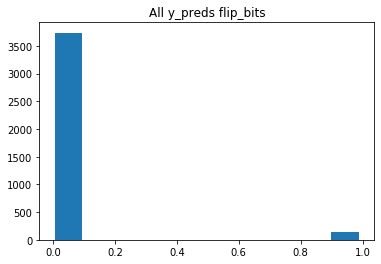

In [156]:
plt.hist(y_pred, rwidth=0.9)
plt.title('All y_preds flip_bits')

In [54]:
print(len(y_pred))

3875


In [157]:
pred_df = pd.DataFrame(y_pred, columns =['Y_pred']) 
pred_df['Label'] = y_test

In [158]:
pred_df.head()

,Y_pred,Label
0,0.000176,0.0
1,0.000143,0.0
2,0.000188,0.0
3,0.000244,0.0
4,0.000174,0.0


In [159]:
y_pred_ref_ref = pred_df[pred_df['Label'] == 1]
y_pred_ref_ref.head()

,Y_pred,Label
54,0.993655,1.0
72,0.993655,1.0
84,0.993655,1.0
141,0.993655,1.0
154,0.993655,1.0


In [160]:
y_pred_non_ref = pred_df[pred_df['Label'] == 0]
y_pred_non_ref.head()

,Y_pred,Label
0,0.000176,0.0
1,0.000143,0.0
2,0.000188,0.0
3,0.000244,0.0
4,0.000174,0.0


In [161]:
print(len(y_pred_non_ref))
print(len(y_pred_ref_ref))

3738
137


Text(0.5, 1.0, 'All y_preds flip_bits')

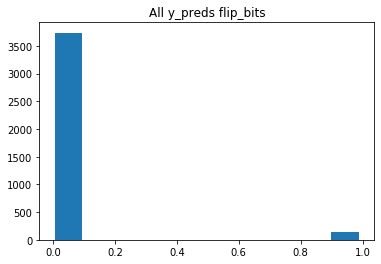

In [162]:
plt.hist(y_pred, rwidth=0.9)
plt.title('All y_preds flip_bits')

Text(0.5, 1.0, 'Ref_Ref y_preds flip bits')

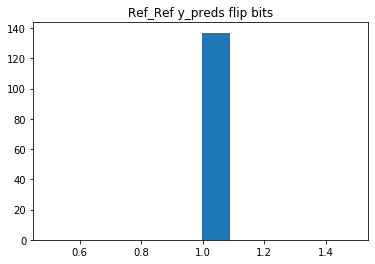

In [163]:
plt.hist(y_pred_ref_ref['Y_pred'], rwidth=0.9)
plt.title('Ref_Ref y_preds flip bits')

Text(0.5, 1.0, 'Not Ref_Ref y_preds flip_bits')

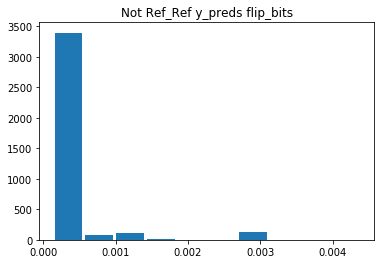

In [164]:
plt.hist(y_pred_non_ref['Y_pred'], rwidth=0.9)
plt.title('Not Ref_Ref y_preds flip_bits')

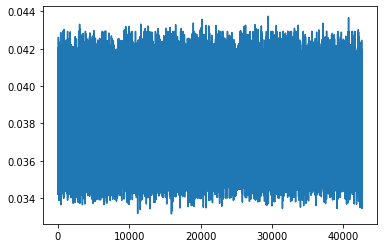

In [39]:
pyplot.plot(y_pred)

In [23]:
# Keep y pred as soft value 
#y_pred[y_pred>0.5] = 1 
#y_pred[y_pred<=0.5] = 0 

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     41254
           1       0.00      0.00      0.00      1371

    accuracy                           0.97     42625
   macro avg       0.48      0.50      0.49     42625
weighted avg       0.94      0.97      0.95     42625

[[41254     0]
 [ 1371     0]]


In [24]:
probs = model.predict_proba(X_test)

In [25]:
auc = roc_auc_score(y_test, probs)
print('AUC', auc)

AUC 0.5084631273471631


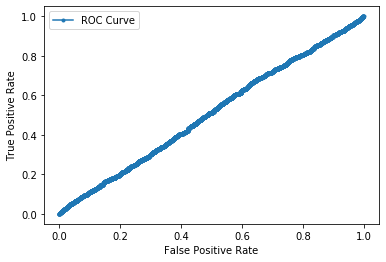

In [26]:
fpr, tpr, _ = roc_curve(y_test, probs)
pyplot.plot(fpr, tpr, marker='.', label='ROC Curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()